# Análisis Climático – El Simbolar, Córdoba
Autor: Gabriel Correa  
Objetivo: análisis climático aplicado a decisiones agrícolas


In [1]:
import os
os.getcwd()

'c:\\Users\\Usuario\\Documents\\analisis_clima_simbolar\\notebooks'

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [3]:
# Parámetros de tiempo
fecha_inicio = datetime(2023, 1, 1)
fecha_fin = datetime(2023, 12, 31)

fechas = pd.date_range(
    start=fecha_inicio,
    end=fecha_fin,
    freq="H"  # datos horarios
)

len(fechas)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19692\2570426499.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range(


8737

In [4]:
# Temperatura base con estacionalidad
temp_base = 18
amplitud = 10

temperatura = (
    temp_base
    + amplitud * np.sin(2 * np.pi * fechas.dayofyear / 365)
    + np.random.normal(0, 1.5, len(fechas))
)

In [5]:
humedad = (
    70
    - 0.5 * temperatura
    + np.random.normal(0, 5, len(fechas))
)

humedad = np.clip(humedad, 20, 100)

In [6]:
df_clima = pd.DataFrame({
    "timestamp": fechas,
    "temperatura_c": temperatura.round(2),
    "humedad_pct": humedad.round(2)
})

df_clima.head()

,timestamp,temperatura_c,humedad_pct
0,2023-01-01 00:00:00,19.46,67.20
1,2023-01-01 01:00:00,19.39,65.95
2,2023-01-01 02:00:00,18.68,62.47
3,2023-01-01 03:00:00,18.74,59.86
4,2023-01-01 04:00:00,19.62,64.34


In [7]:
output_path = "../data/raw/clima_simbolar_2023.csv"
df_clima.to_csv(output_path, index=False)

output_path

'../data/raw/clima_simbolar_2023.csv'

In [8]:
import pandas as pd

ruta = "../data/raw/clima_simbolar_2023.csv"
df = pd.read_csv(ruta)

df.head()

,timestamp,temperatura_c,humedad_pct
0,2023-01-01 00:00:00,19.46,67.20
1,2023-01-01 01:00:00,19.39,65.95
2,2023-01-01 02:00:00,18.68,62.47
3,2023-01-01 03:00:00,18.74,59.86
4,2023-01-01 04:00:00,19.62,64.34


In [9]:
df.shape

(8737, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      8737 non-null   object 
 1   temperatura_c  8737 non-null   float64
 2   humedad_pct    8737 non-null   float64
dtypes: float64(2), object(1)
memory usage: 204.9+ KB


In [11]:
df.describe()

,temperatura_c,humedad_pct
count,8737.000000,8737.000000
mean,18.005634,61.049557
std,7.224699,6.257865
min,3.550000,36.010000
25%,11.080000,56.740000
50%,18.070000,61.090000
75%,24.900000,65.440000
max,33.240000,83.310000


In [12]:
df.tail()

,timestamp,temperatura_c,humedad_pct
8732,2023-12-30 20:00:00,16.95,70.58
8733,2023-12-30 21:00:00,18.39,61.86
8734,2023-12-30 22:00:00,18.36,62.22
8735,2023-12-30 23:00:00,15.99,59.20
8736,2023-12-31 00:00:00,16.33,61.05


In [13]:
df.sample(5)

,timestamp,temperatura_c,humedad_pct
4074,2023-06-19 18:00:00,19.17,58.93
72,2023-01-04 00:00:00,18.63,59.15
8517,2023-12-21 21:00:00,16.54,59.77
2970,2023-05-04 18:00:00,27.58,59.74
5628,2023-08-23 12:00:00,9.17,66.10


In [14]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      8737 non-null   datetime64[ns]
 1   temperatura_c  8737 non-null   float64       
 2   humedad_pct    8737 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 204.9 KB


In [15]:
df["timestamp"].min(), df["timestamp"].max()

(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df = df.set_index("timestamp")
df.head()

,temperatura_c,humedad_pct
timestamp,,
2023-01-01 00:00:00,19.46,67.20
2023-01-01 01:00:00,19.39,65.95
2023-01-01 02:00:00,18.68,62.47
2023-01-01 03:00:00,18.74,59.86
2023-01-01 04:00:00,19.62,64.34


In [18]:
df["temperatura_c"].head()

timestamp
2023-01-01 00:00:00    19.46
2023-01-01 01:00:00    19.39
2023-01-01 02:00:00    18.68
2023-01-01 03:00:00    18.74
2023-01-01 04:00:00    19.62
Name: temperatura_c, dtype: float64

In [19]:
df[["temperatura_c", "humedad_pct"]].head()

,temperatura_c,humedad_pct
timestamp,,
2023-01-01 00:00:00,19.46,67.20
2023-01-01 01:00:00,19.39,65.95
2023-01-01 02:00:00,18.68,62.47
2023-01-01 03:00:00,18.74,59.86
2023-01-01 04:00:00,19.62,64.34


In [20]:
df.loc["2023-01-15"]

,temperatura_c,humedad_pct
timestamp,,
2023-01-15 00:00:00,21.77,61.02
2023-01-15 01:00:00,22.15,51.13
2023-01-15 02:00:00,20.93,56.58
2023-01-15 03:00:00,21.35,53.20
2023-01-15 04:00:00,20.20,59.32
2023-01-15 05:00:00,22.48,69.79
2023-01-15 06:00:00,20.91,56.12
2023-01-15 07:00:00,21.73,45.94
2023-01-15 08:00:00,19.33,62.98


In [21]:
df.loc["2023-06-01":"2023-06-07"]

,temperatura_c,humedad_pct
timestamp,,
2023-06-01 00:00:00,22.98,66.30
2023-06-01 01:00:00,24.40,61.68
2023-06-01 02:00:00,24.69,60.35
2023-06-01 03:00:00,21.60,58.74
2023-06-01 04:00:00,22.45,57.49
...,...,...
2023-06-07 19:00:00,21.71,59.87
2023-06-07 20:00:00,23.91,57.06
2023-06-07 21:00:00,21.23,54.39


In [22]:
df[df["temperatura_c"] > 30]

,temperatura_c,humedad_pct
timestamp,,
2023-02-22 15:00:00,30.37,52.62
2023-02-25 06:00:00,30.90,50.57
2023-03-01 13:00:00,30.30,61.73
2023-03-02 21:00:00,30.31,47.03
2023-03-06 17:00:00,30.32,64.73
...,...,...
2023-04-23 12:00:00,33.24,54.53
2023-04-26 05:00:00,30.08,50.63
2023-04-29 22:00:00,30.36,58.60


In [23]:
df[df["humedad_pct"] < 30]

,temperatura_c,humedad_pct
timestamp,,


In [24]:
df[
    (df["temperatura_c"] > 30) &
    (df["humedad_pct"] < 40)
]

,temperatura_c,humedad_pct
timestamp,,
2023-04-15 14:00:00,30.54,36.01


In [25]:
df.sort_values("temperatura_c", ascending=False).head()

,temperatura_c,humedad_pct
timestamp,,
2023-04-23 12:00:00,33.24,54.53
2023-04-29 23:00:00,32.36,52.43
2023-03-27 08:00:00,31.93,44.45
2023-03-27 23:00:00,31.73,59.94
2023-04-11 20:00:00,31.65,53.78


In [26]:
df["temperatura_c"].mean()

np.float64(18.00563351264736)

In [27]:
df[["temperatura_c", "humedad_pct"]].corr()

,temperatura_c,humedad_pct
temperatura_c,1.000000,-0.595188
humedad_pct,-0.595188,1.000000


In [28]:
df_diario = df.resample("D").mean()
df_diario.head()

,temperatura_c,humedad_pct
timestamp,,
2023-01-01,18.582083,62.947500
2023-01-02,18.444167,62.485417
2023-01-03,18.922917,61.965417
2023-01-04,19.007500,58.936250
2023-01-05,19.015000,59.259583


In [29]:
df_mensual = df.resample("M").mean()
df_mensual

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19692\2080885955.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.resample("M").mean()


,temperatura_c,humedad_pct
timestamp,,
2023-01-31,20.770457,59.815417
2023-02-28,25.013452,57.471414
2023-03-31,27.384382,56.109194
2023-04-30,27.612819,56.319000
2023-05-31,25.125094,57.174637
2023-06-30,20.689792,59.556347
2023-07-31,15.536788,62.481962
2023-08-31,11.000108,64.713629
2023-09-30,8.503472,65.875889


In [30]:
df_mensual = df.resample("ME").mean()
df_mensual

,temperatura_c,humedad_pct
timestamp,,
2023-01-31,20.770457,59.815417
2023-02-28,25.013452,57.471414
2023-03-31,27.384382,56.109194
2023-04-30,27.612819,56.319000
2023-05-31,25.125094,57.174637
2023-06-30,20.689792,59.556347
2023-07-31,15.536788,62.481962
2023-08-31,11.000108,64.713629
2023-09-30,8.503472,65.875889


In [31]:
df["temp_media_24h"] = df["temperatura_c"].rolling(24).mean()
df.head(30)

,temperatura_c,humedad_pct,temp_media_24h
timestamp,,,
2023-01-01 00:00:00,19.46,67.20,NaN
2023-01-01 01:00:00,19.39,65.95,NaN
2023-01-01 02:00:00,18.68,62.47,NaN
2023-01-01 03:00:00,18.74,59.86,NaN
2023-01-01 04:00:00,19.62,64.34,NaN
2023-01-01 05:00:00,18.51,64.22,NaN
2023-01-01 06:00:00,18.18,56.42,NaN
2023-01-01 07:00:00,20.03,59.88,NaN
2023-01-01 08:00:00,17.34,67.53,NaN


In [32]:
df["alerta_calor"] = df["temperatura_c"] > 35
df[["temperatura_c", "alerta_calor"]].sample(10)

,temperatura_c,alerta_calor
timestamp,,
2023-01-30 15:00:00,22.70,False
2023-12-30 21:00:00,18.39,False
2023-08-15 23:00:00,12.46,False
2023-08-17 21:00:00,11.82,False
2023-06-19 14:00:00,18.84,False
2023-11-24 19:00:00,10.97,False
2023-06-27 00:00:00,17.86,False
2023-11-07 00:00:00,8.83,False
2023-05-21 14:00:00,25.75,False


In [33]:
df.query("temperatura_c > 30")

,temperatura_c,humedad_pct,temp_media_24h,alerta_calor
timestamp,,,,
2023-02-22 15:00:00,30.37,52.62,25.477500,False
2023-02-25 06:00:00,30.90,50.57,26.371250,False
2023-03-01 13:00:00,30.30,61.73,26.537917,False
2023-03-02 21:00:00,30.31,47.03,27.057917,False
2023-03-06 17:00:00,30.32,64.73,26.850417,False
...,...,...,...,...
2023-04-23 12:00:00,33.24,54.53,28.116667,False
2023-04-26 05:00:00,30.08,50.63,27.150417,False
2023-04-29 22:00:00,30.36,58.60,27.042083,False


In [34]:
df.query("temperatura_c > 30 and humedad_pct < 40")

,temperatura_c,humedad_pct,temp_media_24h,alerta_calor
timestamp,,,,
2023-04-15 14:00:00,30.54,36.01,27.925833,False


In [35]:
df.eval(
    "indice_confort = temperatura_c - (0.55 - 0.0055 * humedad_pct) * (temperatura_c - 14.5)",
    inplace=True
)

df[["temperatura_c", "humedad_pct", "indice_confort"]].head()

,temperatura_c,humedad_pct,indice_confort
timestamp,,,
2023-01-01 00:00:00,19.46,67.20,18.565216
2023-01-01 01:00:00,19.39,65.95,18.474225
2023-01-01 02:00:00,18.68,62.47,17.817185
2023-01-01 03:00:00,18.74,59.86,17.803935
2023-01-01 04:00:00,19.62,64.34,18.615814


In [36]:
df["mes"] = df.index.month

In [37]:
df.groupby("mes")["temperatura_c"].mean()

mes
1     20.770457
2     25.013452
3     27.384382
4     27.612819
5     25.125094
6     20.689792
7     15.536788
8     11.000108
9      8.503472
10     8.504987
11    10.984528
12    15.402926
Name: temperatura_c, dtype: float64

In [38]:
df.groupby("mes").agg({
    "temperatura_c": ["mean", "min", "max"],
    "humedad_pct": ["mean", "min", "max"]
})

temperatura_c               humedad_pct              
             mean    min    max        mean    min    max
mes                                                      
1       20.770457  14.64  26.62   59.815417  42.91  74.66
2       25.013452  20.22  30.90   57.471414  43.17  72.25
3       27.384382  22.56  31.93   56.109194  40.64  73.24
4       27.612819  22.74  33.24   56.319000  36.01  72.56
5       25.125094  19.97  30.02   57.174637  42.98  70.50
6       20.689792  15.25  27.06   59.556347  44.22  74.82
7       15.536788   8.06  21.55   62.481962  46.91  82.60
8       11.000108   5.61  17.14   64.713629  50.36  79.58
9        8.503472   3.55  13.33   65.875889  51.03  79.45
10       8.504987   3.94  14.63   65.743642  48.94  79.99
11      10.984528   4.53  16.60   64.866972  50.73  80.90
12      15.402926   9.85  21.90   62.235021  48.55  83.31

In [39]:
def estacion(mes):
    if mes in [12, 1, 2]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Otoño"
    elif mes in [6, 7, 8]:
        return "Invierno"
    else:
        return "Primavera"

df["estacion"] = df.index.month.map(estacion)

In [40]:
df.groupby("estacion")[["temperatura_c", "humedad_pct"]].mean()

,temperatura_c,humedad_pct
estacion,,
Invierno,15.688451,62.279932
Otoño,26.697591,56.536617
Primavera,9.321918,65.498228
Verano,20.293762,59.894670


In [41]:
df.query("temperatura_c > 35").shape[0]

0

In [42]:
df.query("temperatura_c > 35").groupby("estacion").size()

Series([], dtype: int64)

In [43]:
df["temp_media_mes"] = (
    df.groupby("mes")["temperatura_c"]
    .transform("mean")
)

df["desvio_temp_mes"] = df["temperatura_c"] - df["temp_media_mes"]

In [44]:
df["evento_calor"] = df["temperatura_c"] > 35
df["evento_frio"] = df["temperatura_c"] < 5

In [45]:
df_raw = df.copy()
df = df.copy()

In [46]:
np.random.seed(42)

idx_nan = np.random.choice(df.index, size=200, replace=False)
df.loc[idx_nan, "temperatura_c"] = np.nan

In [47]:
idx_err = np.random.choice(df.index, size=50, replace=False)
df.loc[idx_err, "humedad_pct"] = -10

In [48]:
idx_out = np.random.choice(df.index, size=30, replace=False)
df.loc[idx_out, "temperatura_c"] = 60

In [49]:
df.isna().sum()

temperatura_c      200
humedad_pct          0
temp_media_24h      23
alerta_calor         0
indice_confort       0
mes                  0
estacion             0
temp_media_mes       0
desvio_temp_mes      0
evento_calor         0
evento_frio          0
dtype: int64

In [50]:
(df["humedad_pct"] < 0).sum()

np.int64(50)

In [51]:
df["temperatura_c"].describe()

count    8537.000000
mean       18.171761
std         7.632365
min         3.550000
25%        11.110000
50%        18.180000
75%        25.010000
max        60.000000
Name: temperatura_c, dtype: float64

In [52]:
df.loc[df["humedad_pct"] < 0, "humedad_pct"] = np.nan

In [53]:
df.loc[df["temperatura_c"] > 45, "temperatura_c"] = np.nan
df.loc[df["temperatura_c"] < -30, "temperatura_c"] = np.nan

In [54]:
df["temperatura_c"] = df["temperatura_c"].interpolate(method="time")
df["humedad_pct"] = df["humedad_pct"].interpolate(method="time")

In [55]:
df.isna().sum()

temperatura_c       0
humedad_pct         0
temp_media_24h     23
alerta_calor        0
indice_confort      0
mes                 0
estacion            0
temp_media_mes      0
desvio_temp_mes     0
evento_calor        0
evento_frio         0
dtype: int64

In [56]:
df.describe()

,temperatura_c,humedad_pct,temp_media_24h,indice_confort,mes,temp_media_mes,desvio_temp_mes
count,8737.000000,8737.000000,8714.000000,8737.000000,8737.000000,8737.000000,8.737000e+03
mean,18.008243,61.046114,18.005284,17.106647,6.511617,18.005634,1.626514e-16
std,7.224552,6.250477,7.084319,5.609528,3.441110,6.991909,1.819197e+00
min,3.550000,36.010000,7.434583,5.587878,1.000000,8.503472,-7.476788e+00
25%,11.070000,56.730000,10.870625,11.757025,4.000000,11.000108,-1.273452e+00
50%,18.090000,61.090000,17.890833,17.300430,7.000000,15.536788,2.547222e-02
75%,24.900000,65.430000,25.212292,22.454740,10.000000,25.125094,1.216548e+00
max,33.240000,83.310000,28.692500,28.553407,12.000000,27.612819,6.497074e+00


In [57]:
df["dato_valido"] = (
    df["temperatura_c"].between(-30, 45) &
    df["humedad_pct"].between(0, 100)
)

In [58]:
output_path = "../data/processed/clima_simbolar_2023_clean.csv"
df.to_csv(output_path)

output_path

'../data/processed/clima_simbolar_2023_clean.csv'

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

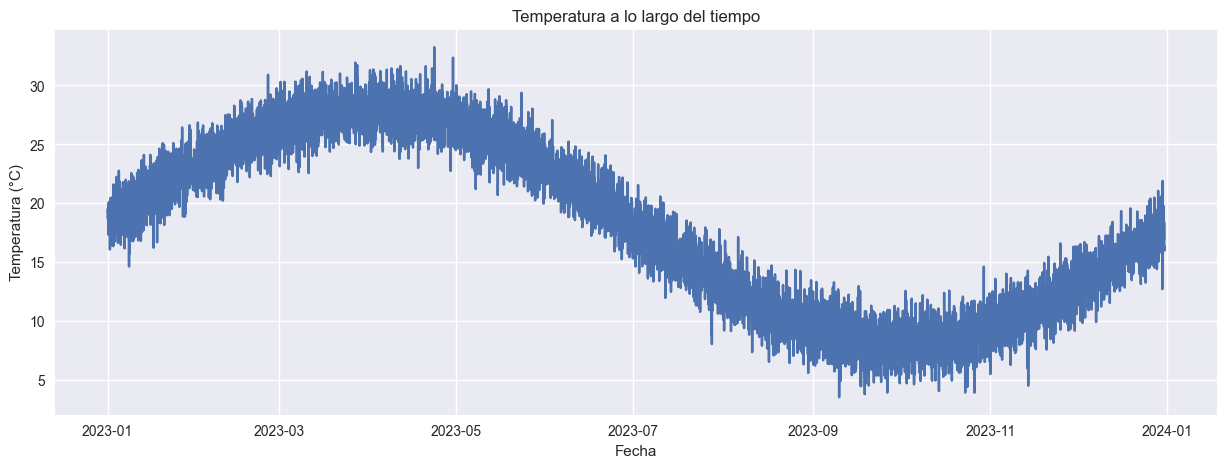

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["temperatura_c"])
plt.title("Temperatura a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.show()

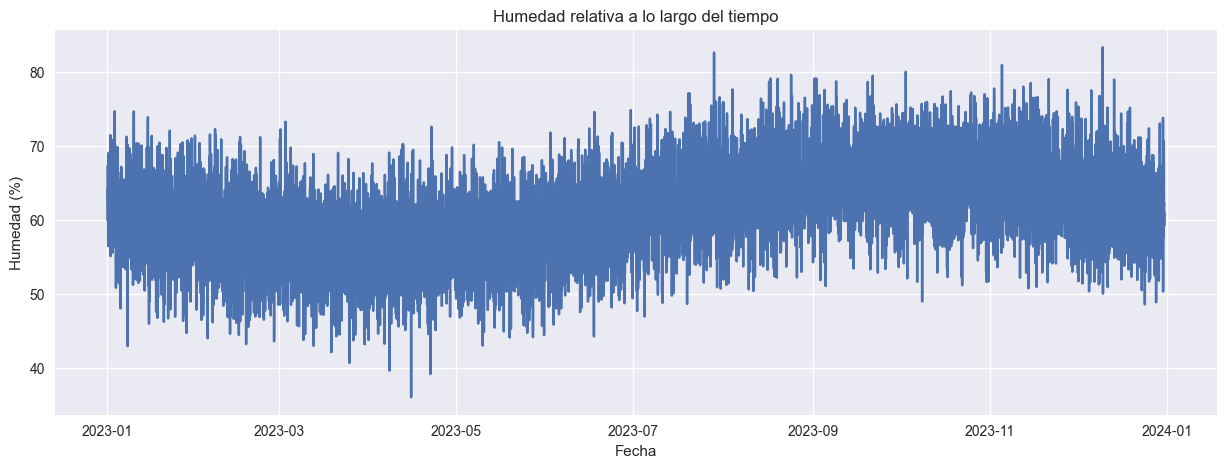

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["humedad_pct"])
plt.title("Humedad relativa a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Humedad (%)")
plt.show()

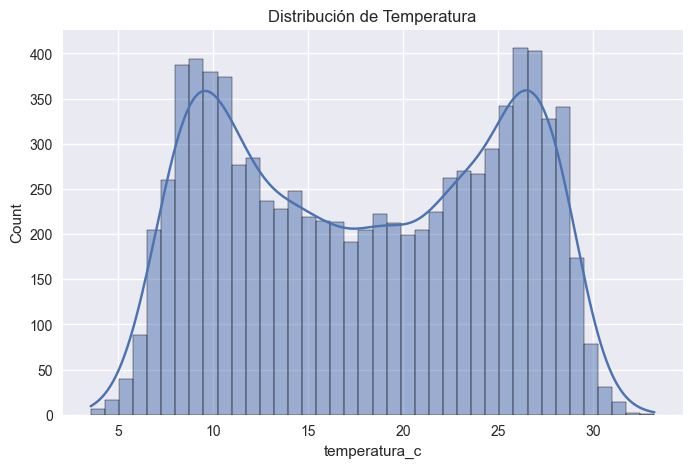

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(df["temperatura_c"], bins=40, kde=True)
plt.title("Distribución de Temperatura")
plt.show()

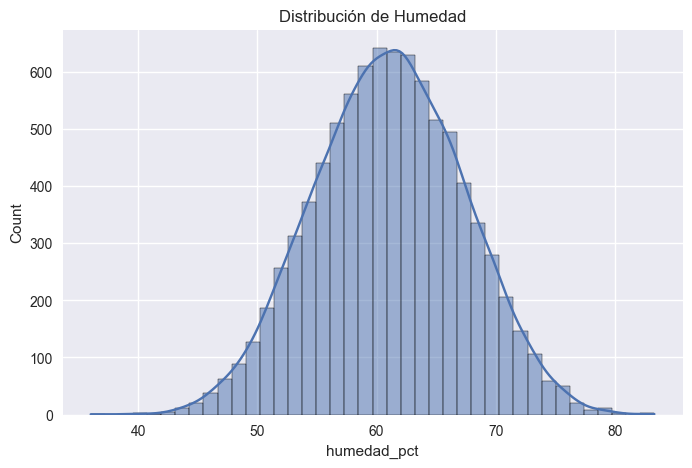

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(df["humedad_pct"], bins=40, kde=True)
plt.title("Distribución de Humedad")
plt.show()

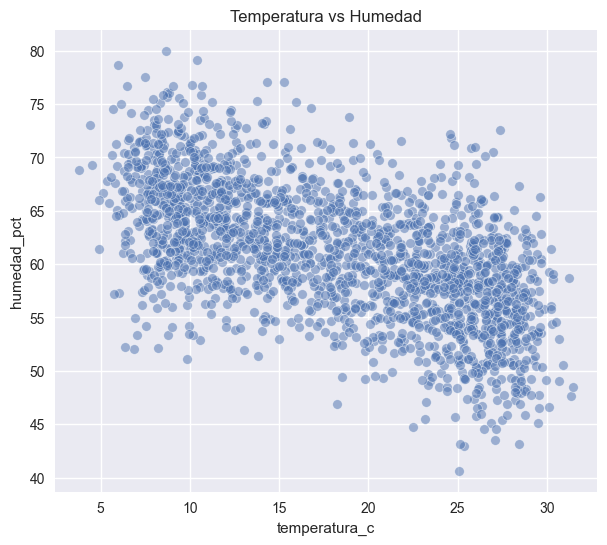

In [64]:
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df.sample(2000),  # sample para performance
    x="temperatura_c",
    y="humedad_pct",
    alpha=0.5
)
plt.title("Temperatura vs Humedad")
plt.show()

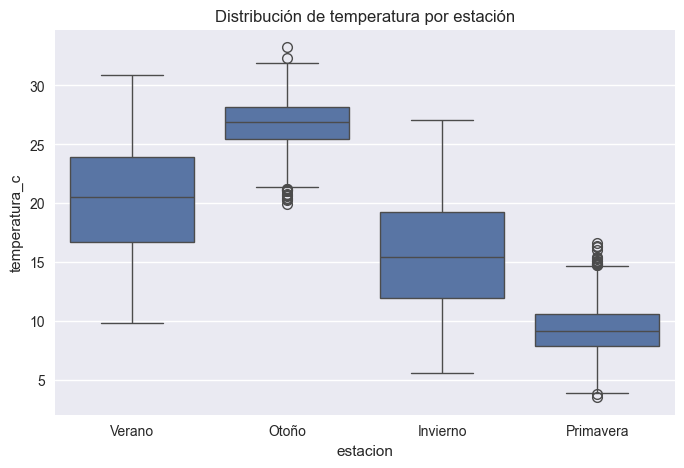

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="estacion", y="temperatura_c")
plt.title("Distribución de temperatura por estación")
plt.show()

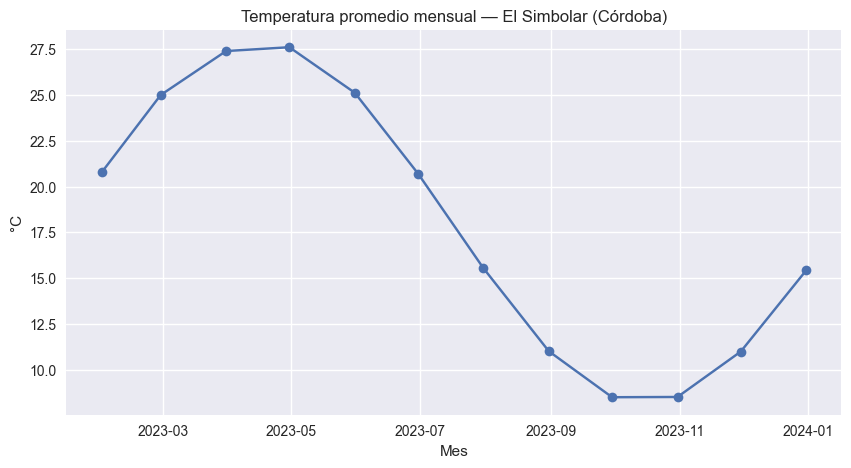

In [66]:
df_mensual = df.resample("ME").mean(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.plot(df_mensual.index, df_mensual["temperatura_c"], marker="o")
plt.title("Temperatura promedio mensual — El Simbolar (Córdoba)")
plt.ylabel("°C")
plt.xlabel("Mes")
plt.show()

In [67]:
import numpy as np

base = 22        # temperatura media anual Córdoba
amplitud = 10   # variación estacional

mes = df.index.month

df["temperatura_c"] = (
    base
    + amplitud * np.cos(2 * np.pi * (mes - 1) / 12)
    + np.random.normal(0, 1.5, size=len(df))
)

<Axes: title={'center': 'Temperatura promedio mensual — El Simbolar (Córdoba)'}, xlabel='timestamp'>

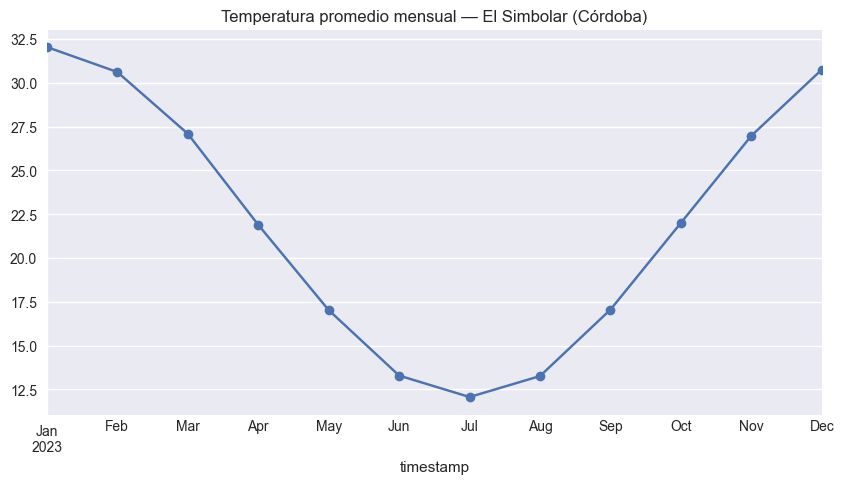

In [68]:
df_mensual = df.resample("ME").mean(numeric_only=True)

df_mensual["temperatura_c"].plot(
    figsize=(10, 5),
    title="Temperatura promedio mensual — El Simbolar (Córdoba)",
    marker="o"
)

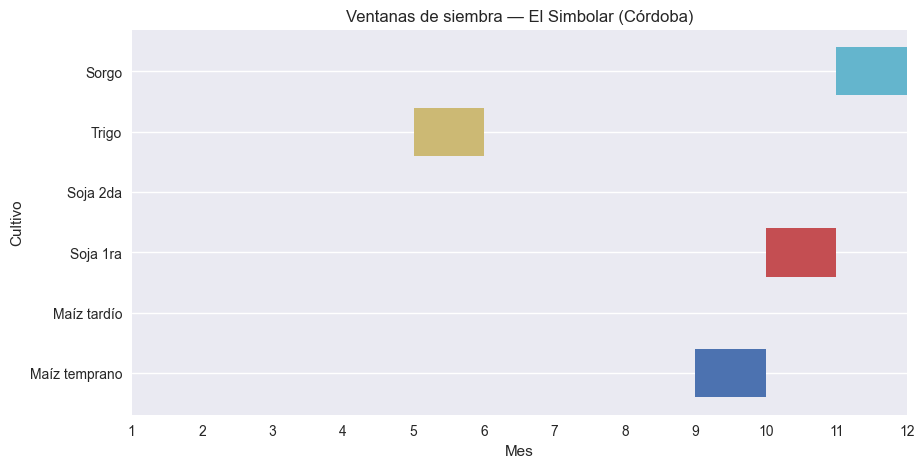

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

cultivos = pd.DataFrame({
    "cultivo": ["Maíz temprano", "Maíz tardío", "Soja 1ra", "Soja 2da", "Trigo", "Sorgo"],
    "inicio": [9, 12, 10, 12, 5, 11],
    "fin":     [10, 12, 11, 12, 6, 12]
})

plt.figure(figsize=(10,5))

for i, row in cultivos.iterrows():
    plt.barh(row["cultivo"], row["fin"] - row["inicio"], left=row["inicio"])

plt.xlabel("Mes")
plt.ylabel("Cultivo")
plt.title("Ventanas de siembra — El Simbolar (Córdoba)")
plt.xticks(range(1,13))
plt.grid(axis="x")
plt.show()


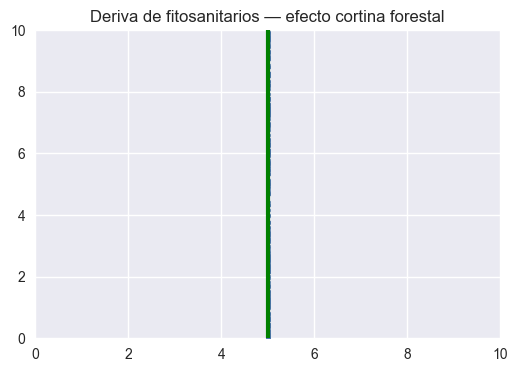

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# parámetros
n = 200
x = np.zeros(n)
y = np.random.uniform(0, 10, n)

viento = 0.15
cortina_x = 5

fig, ax = plt.subplots(figsize=(6,4))
scat = ax.scatter(x, y, s=10)
linea = ax.axvline(cortina_x, color="green", linewidth=3)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Deriva de fitosanitarios — efecto cortina forestal")

def update(frame):
    global x
    x = x + viento
    x = np.where(x > cortina_x, cortina_x, x)  # la cortina frena
    scat.set_offsets(np.c_[x, y])
    return scat,

ani = FuncAnimation(fig, update, frames=40)
ani.save("deriva_viento.gif", writer="pillow")


In [72]:
import os
os.getcwd()

'c:\\Users\\Usuario\\Documents\\analisis_clima_simbolar\\notebooks'

In [73]:
import os

os.chdir("..")  # subir de notebooks/ a analisis_clima_simbolar
os.getcwd()

'c:\\Users\\Usuario\\Documents\\analisis_clima_simbolar'

In [74]:
df.to_csv(
    "data/processed/clima_simbolar_2023_clean.csv",
    index=False
)

In [75]:
import pandas as pd

df_test = pd.read_csv("data/processed/clima_simbolar_2023_clean.csv")
print(df_test.columns)

Index(['temperatura_c', 'humedad_pct', 'temp_media_24h', 'alerta_calor',
       'indice_confort', 'mes', 'estacion', 'temp_media_mes',
       'desvio_temp_mes', 'evento_calor', 'evento_frio', 'dato_valido'],
      dtype='object')
